<a href="https://colab.research.google.com/github/AbhinavRao23/MNIST/blob/master/MNIST_Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi #show the allocated GPU

In [ ]:
#import for ANN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

#import for CNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator
#import for understanding model
from tensorflow.keras.models import Model

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#Reshaping samples ad labels
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [ ]:
epochs = 50
batch_size = 64
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)

AttributeError: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
%%time
h = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle =1)

Epoch 1/10
135/135 [==============================] - 1s 7ms/step - loss: 1.7175 - accuracy: 0.6748 - val_loss: 0.3180 - val_accuracy: 0.9057
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.3316 - accuracy: 0.9051 - val_loss: 0.1960 - val_accuracy: 0.9373
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.9246 - val_loss: 0.2015 - val_accuracy: 0.9377
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2321 - accuracy: 0.9323 - val_loss: 0.1455 - val_accuracy: 0.9565
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2188 - accuracy: 0.9350 - val_loss: 0.1421 - val_accuracy: 0.9552
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.2064 - accuracy: 0.9407 - val_loss: 0.1323 - val_accuracy: 0.9592
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.1888 - accuracy: 0.9448 - val_loss: 0.1360 - val_accuracy: 0.9597
Epoch 

Text(0.5, 1.0, 'accuracy')

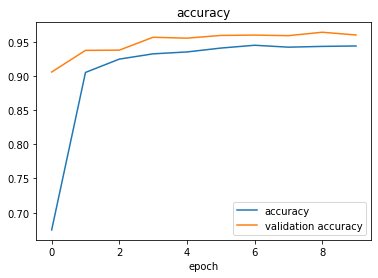

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('epoch')
plt.title('accuracy')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score[1])

0.9592999815940857
